In [2]:
#필요 라이브러리
import pandas as pd
import numpy as np

#################### Train_Test Split ######################
from sklearn.model_selection import train_test_split


#################### 성능평가 ############################
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import sklearn
#################### XGBoost ###########################
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV


################## lgbm ###########################
from lightgbm import LGBMClassifier

##################### Decision Tree #######################
from sklearn.tree import DecisionTreeClassifier

################## RandomForest ##########################
from sklearn.ensemble import RandomForestClassifier

###################### Logistic Rregression ###############
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [3]:
#모델 성능 평가 함수화
def model_assessment(test,pred):
    confusion = confusion_matrix(test, pred)
    accuracy = accuracy_score(test,pred)
    report = metrics.classification_report(test, pred, digits=2)
    
    print('accuracy', accuracy, '\n')
    print('confusion_matrix',confusion, '\n')
    print(report)

In [4]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [6]:
df_m = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/Scaled_data.csv',encoding='cp949')

In [8]:
df_m.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
len(df_m.columns)

61

Text(0.5, 1, '변수 간 상관관게')

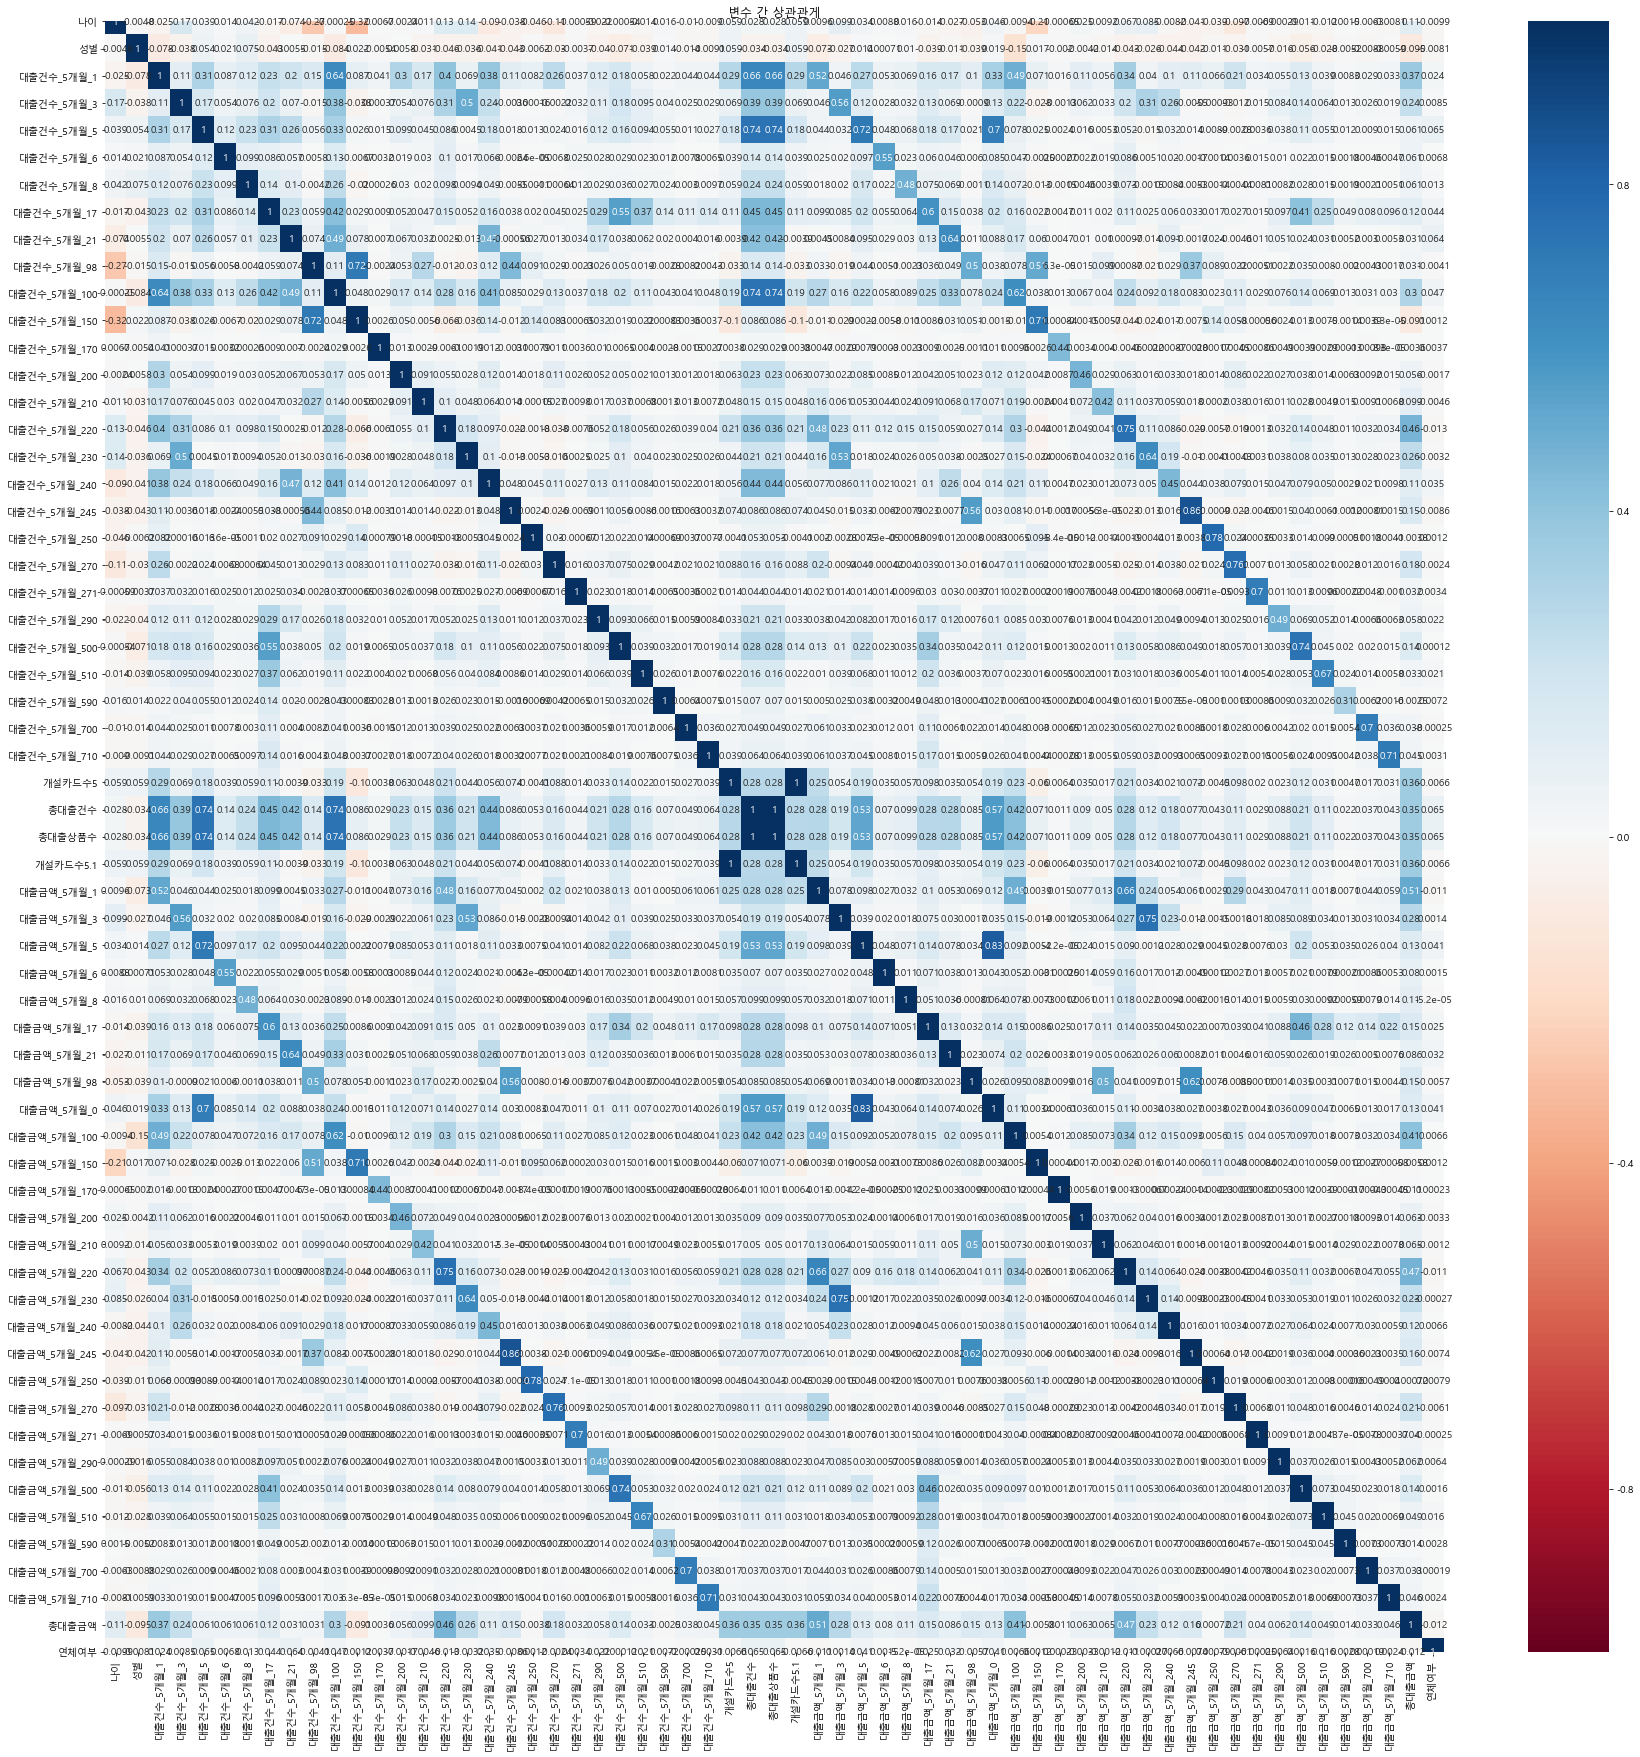

In [10]:
plt.figure(figsize = (30,30))
ax = sns.heatmap(df_m.corr(),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
#plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/4.대출잔액_업권.png')

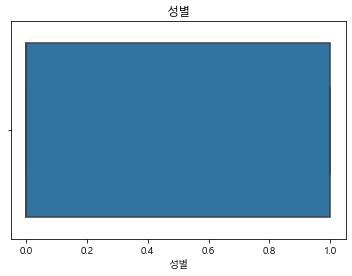

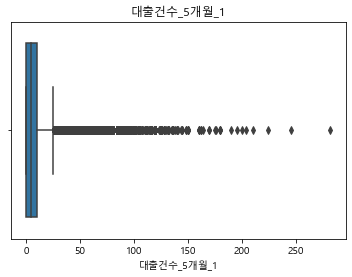

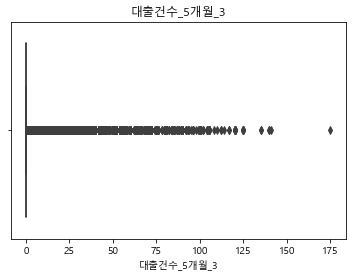

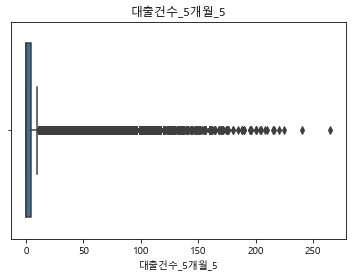

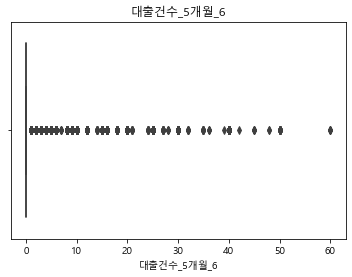

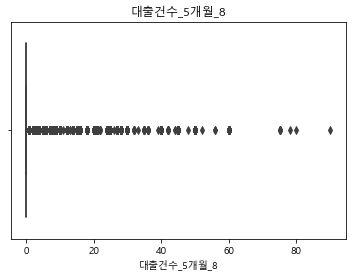

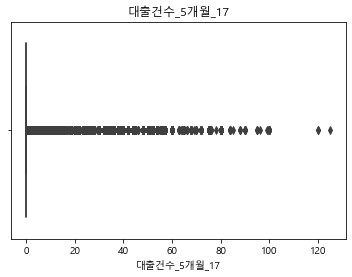

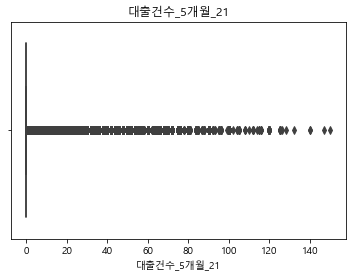

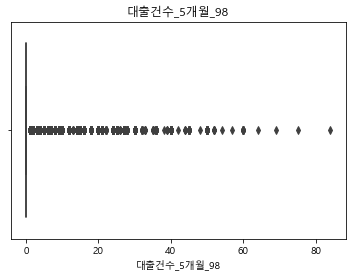

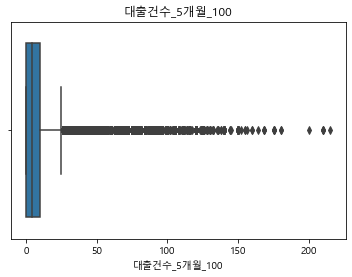

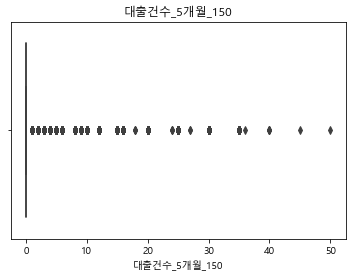

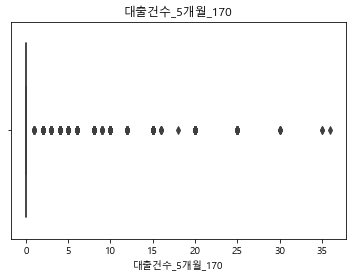

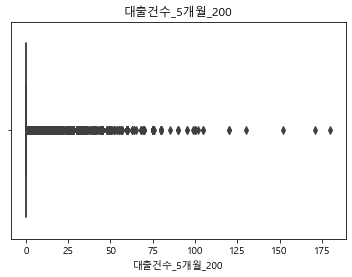

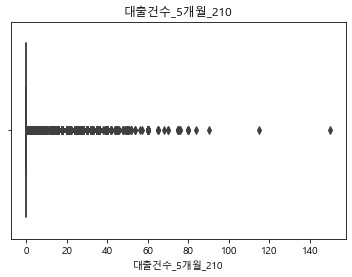

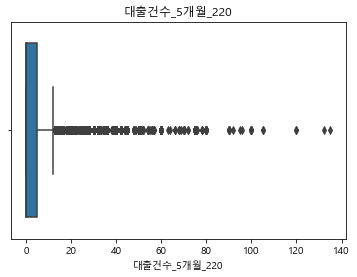

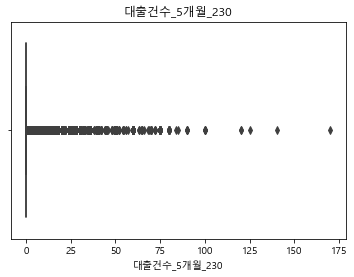

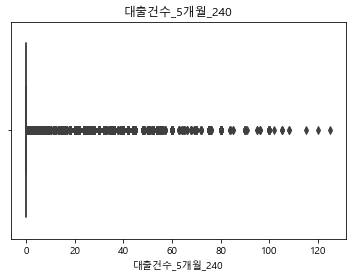

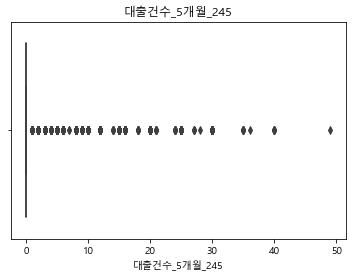

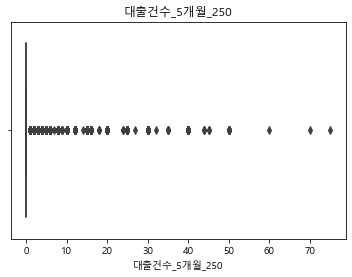

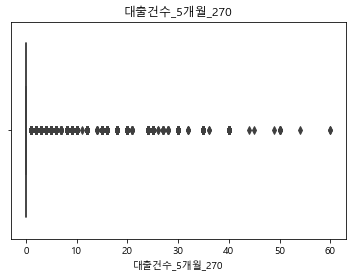

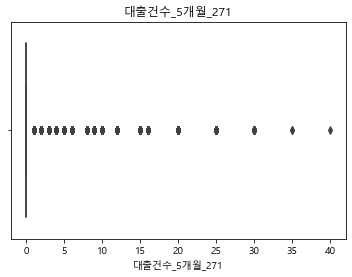

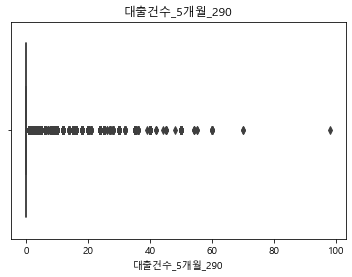

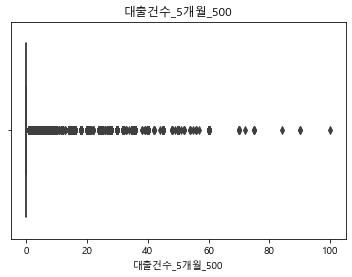

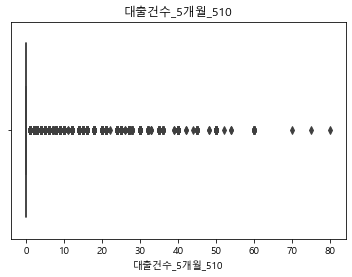

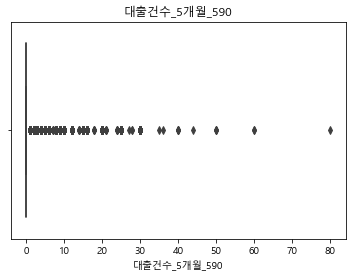

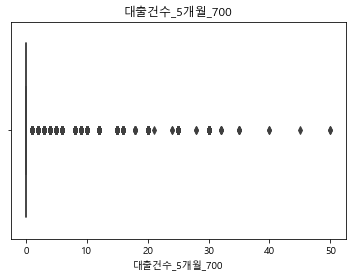

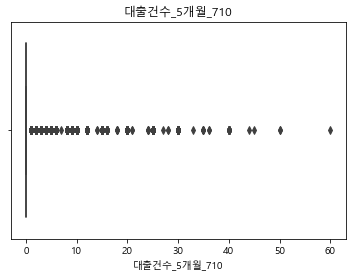

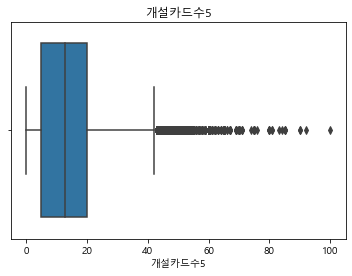

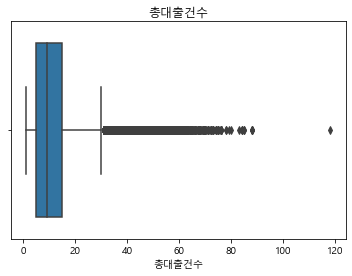

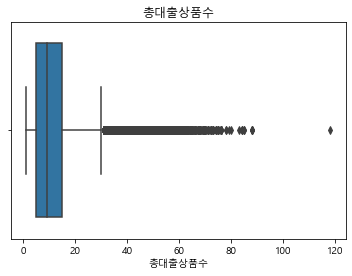

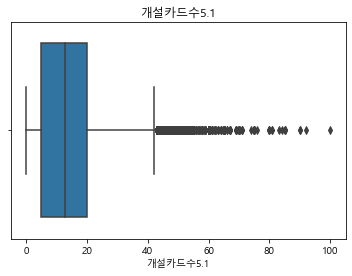

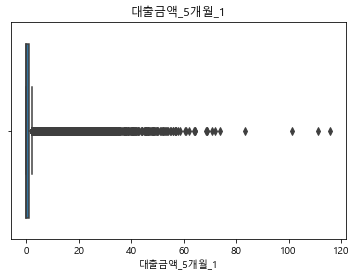

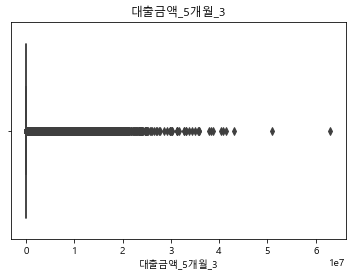

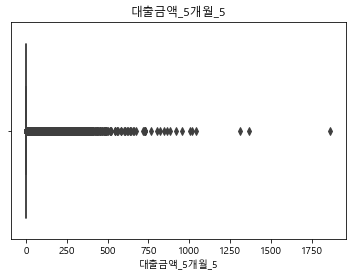

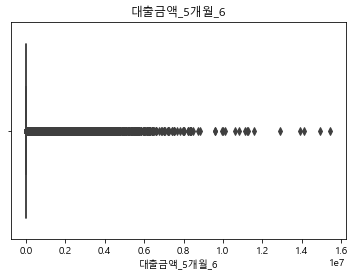

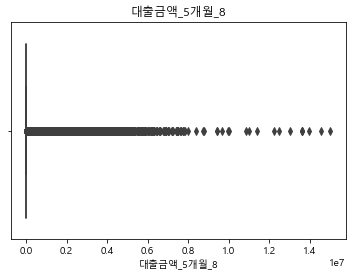

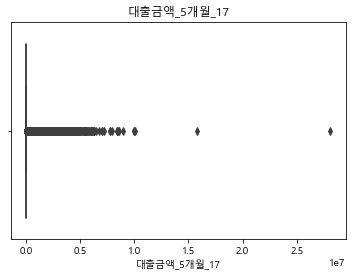

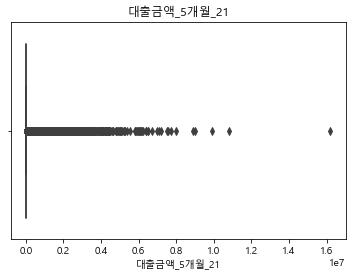

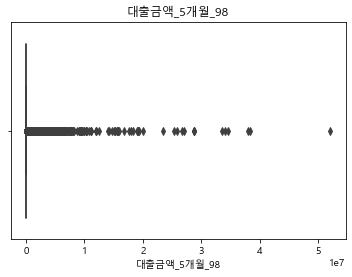

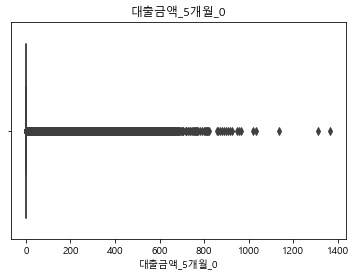

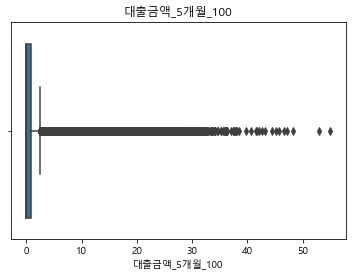

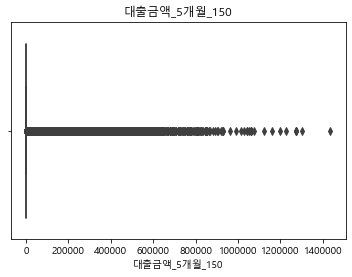

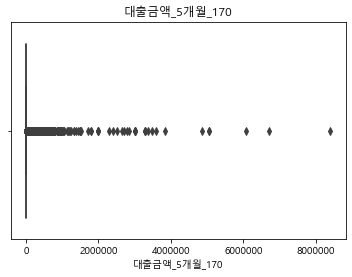

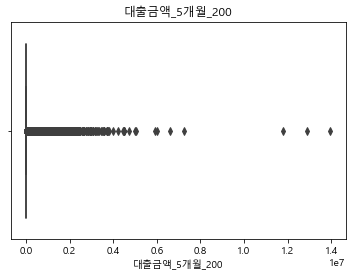

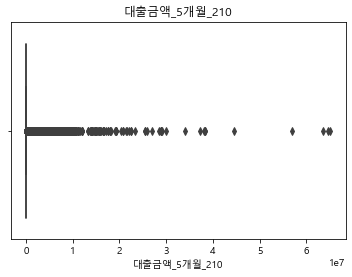

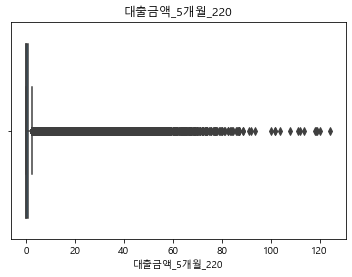

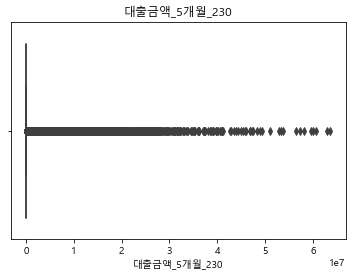

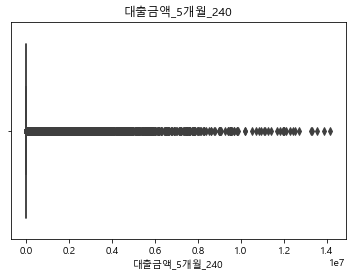

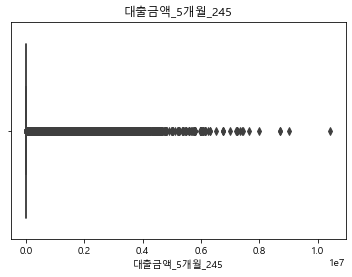

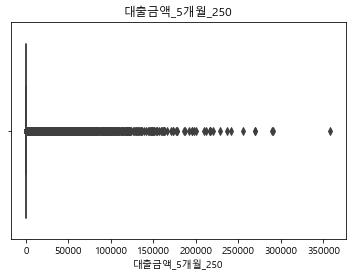

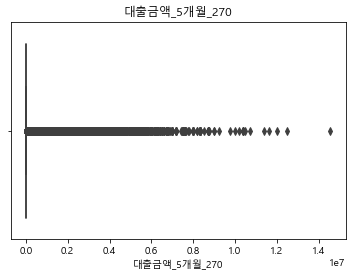

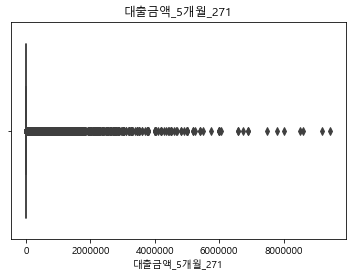

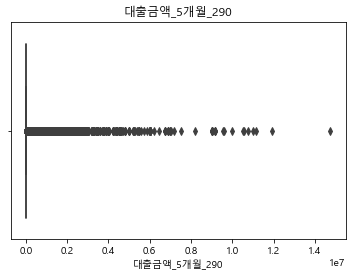

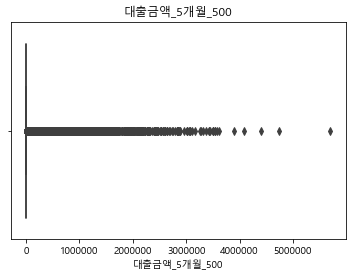

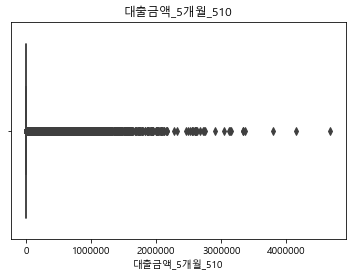

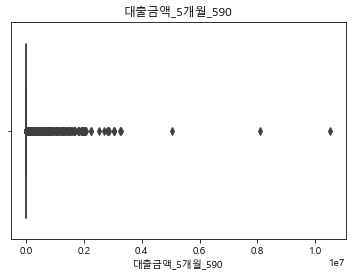

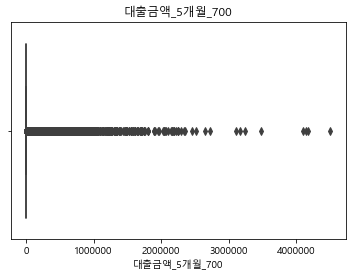

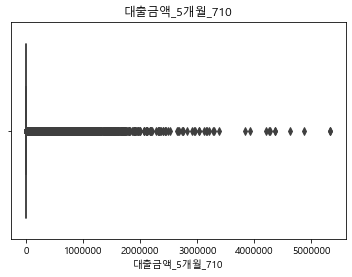

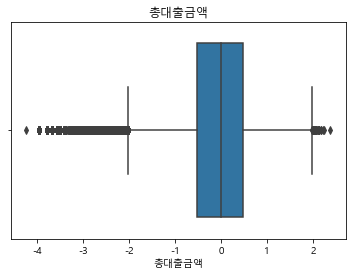

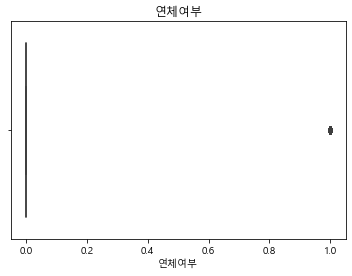

In [11]:
for i in range(1,len(df_m.columns)):
    try:
        sns.boxplot(x=df_m.columns[i], hue='연체여부', data=df_m)
        plt.title(df_m.columns[i])
        plt.show()
    
    except Exception as e:
        print('예외발생')

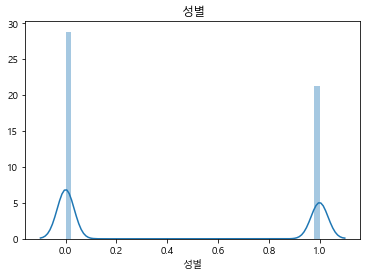

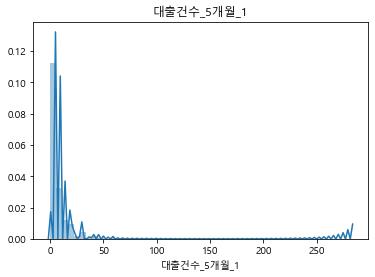

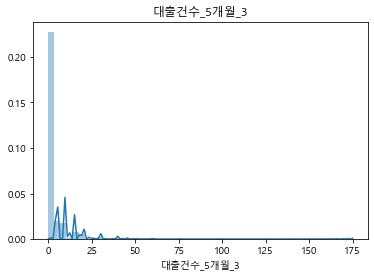

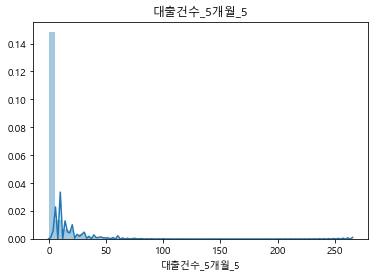

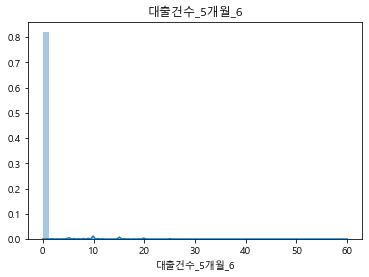

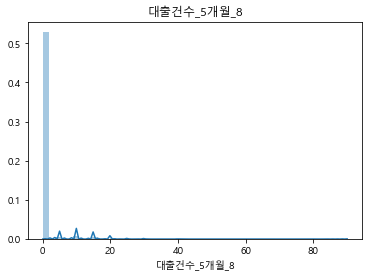

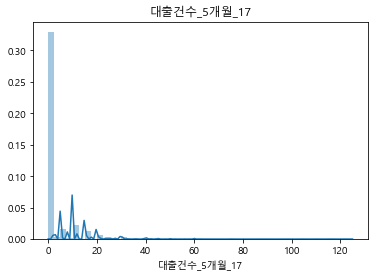

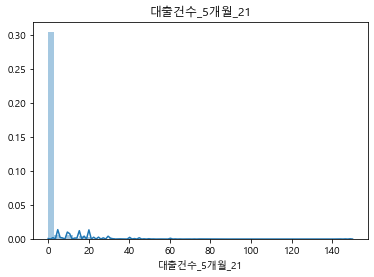

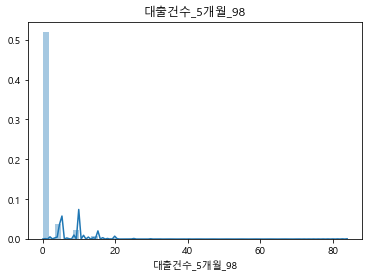

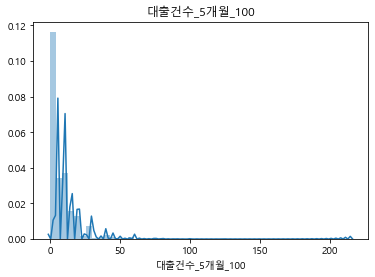

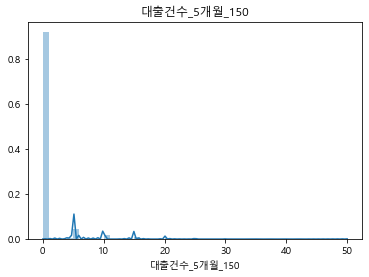

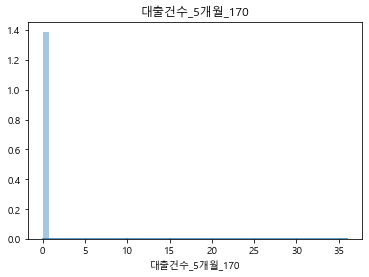

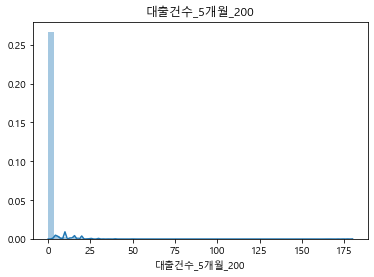

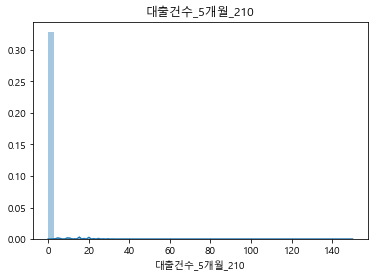

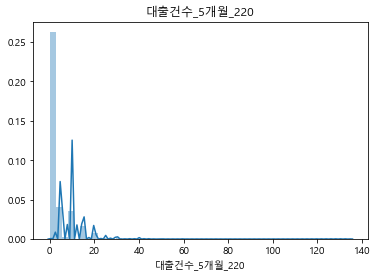

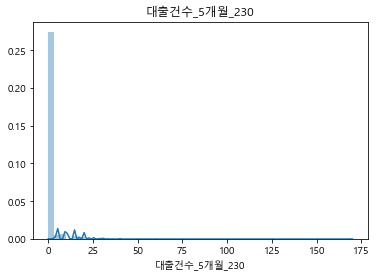

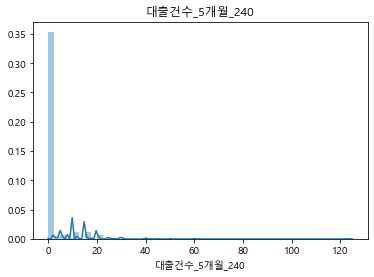

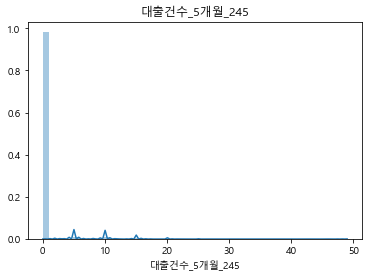

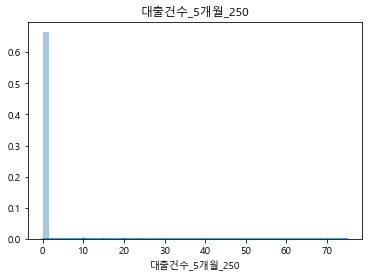

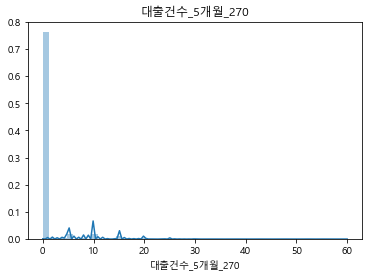

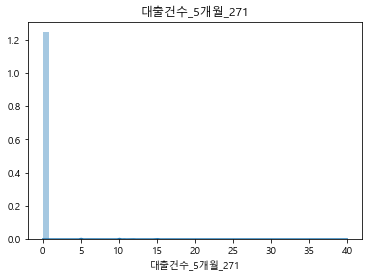

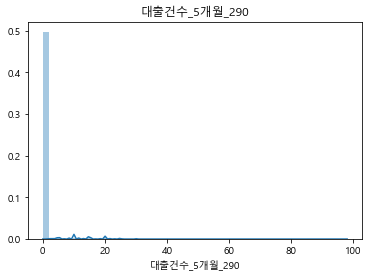

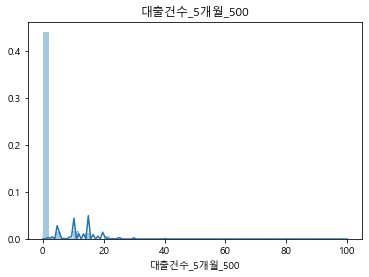

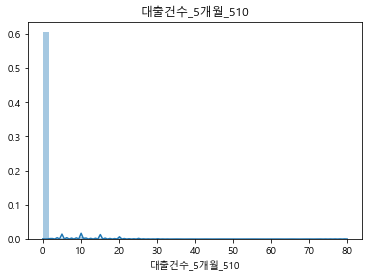

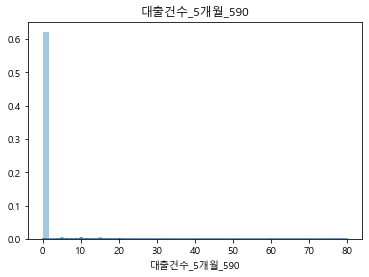

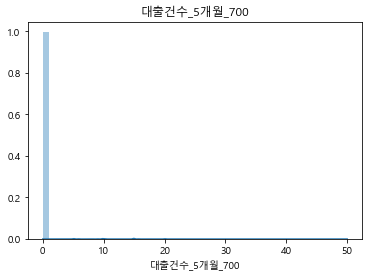

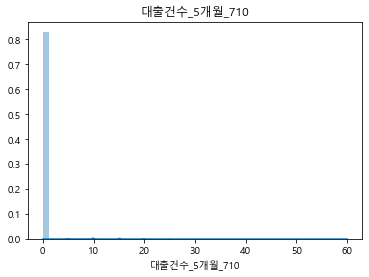

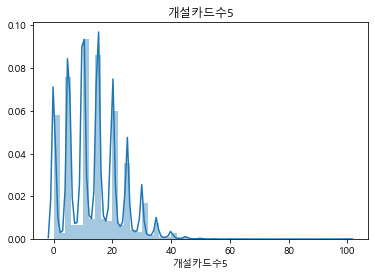

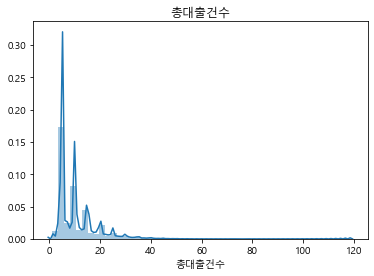

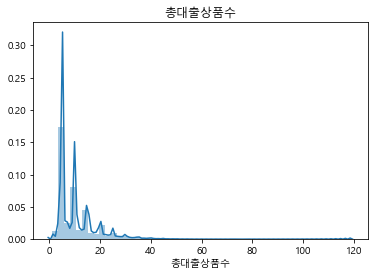

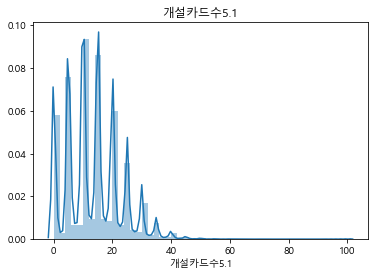

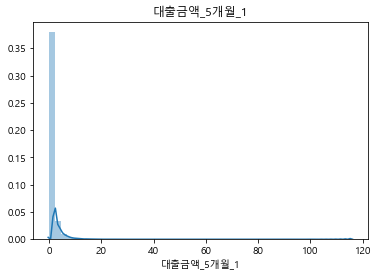

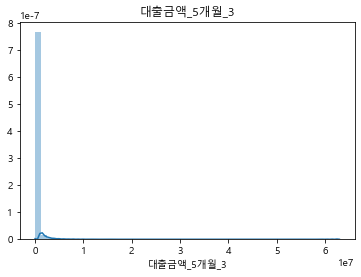

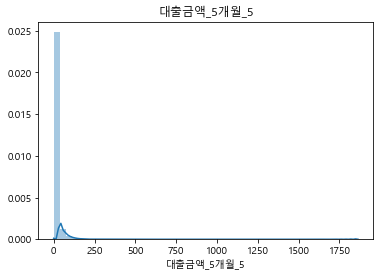

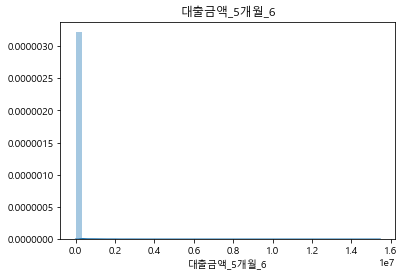

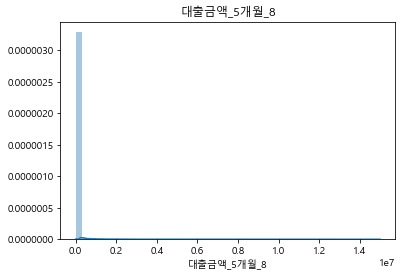

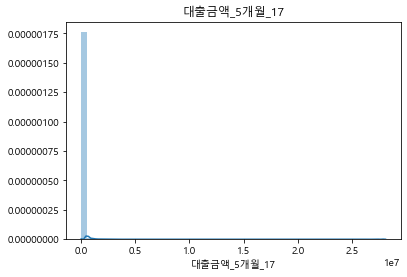

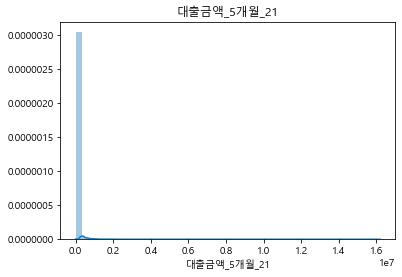

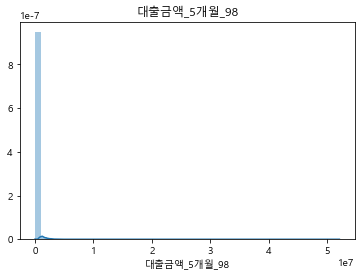

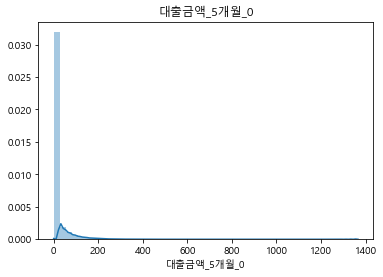

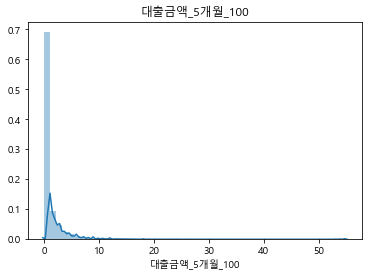

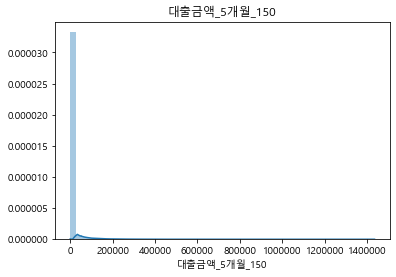

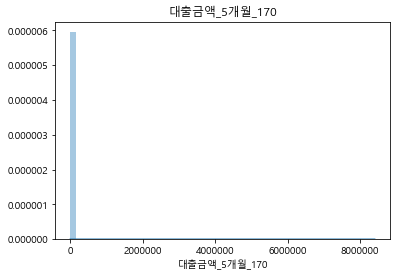

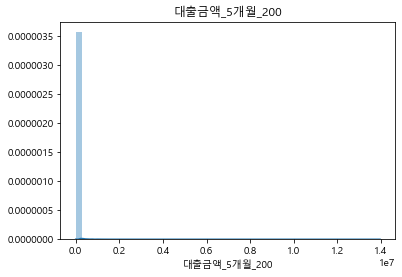

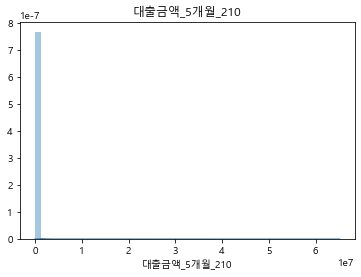

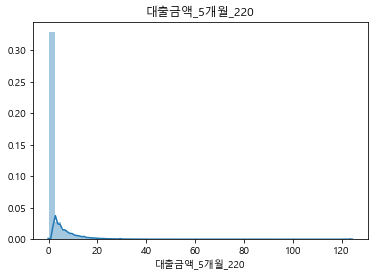

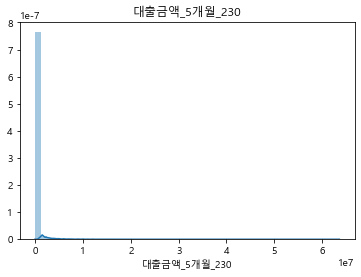

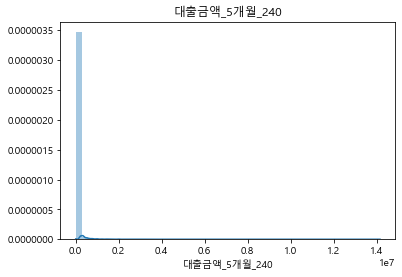

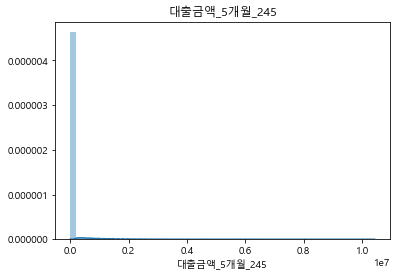

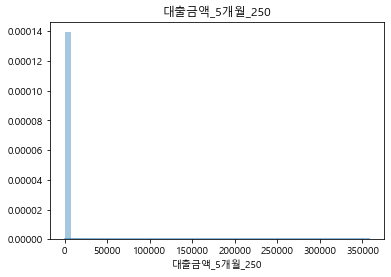

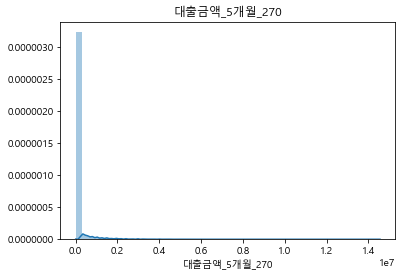

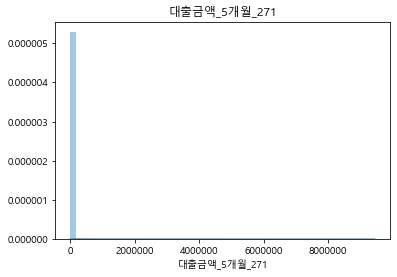

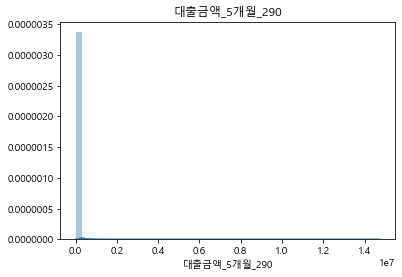

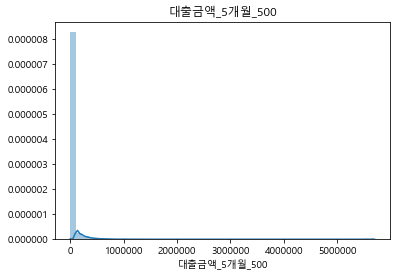

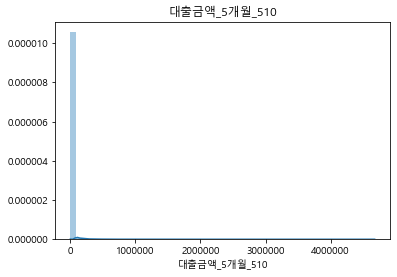

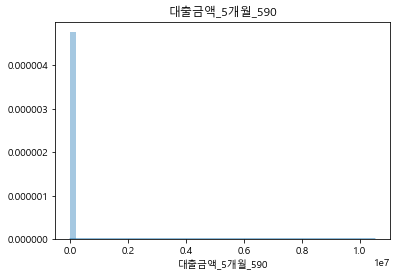

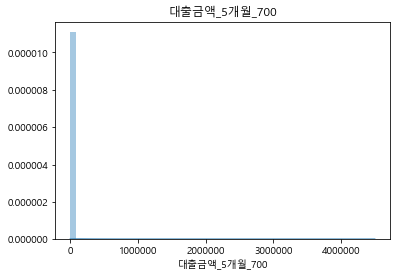

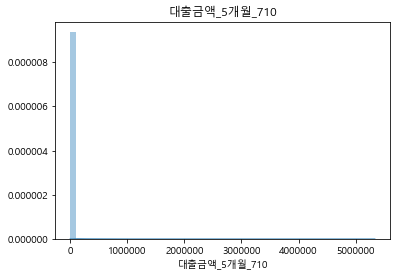

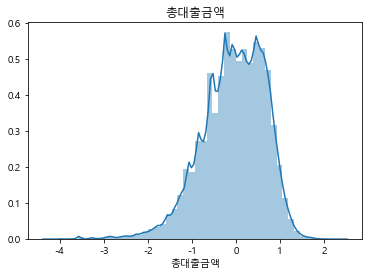

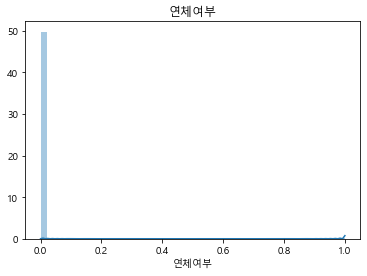

In [12]:
for i in range(1,len(df_m.columns)):
    try:
        sns.distplot(df_m[df_m.columns[i]])
        plt.title(df_m.columns[i])
        plt.show()
    
    except Exception as e:
        print('예외발생')

# 1. Train - Test Split

해당 데이터에서 정상인 케이스 비율이 전체의 약 99.65%, 채무불이행(연체)가 약 0.35%임

In [13]:
df_m['연체여부'].value_counts() / df_m['연체여부'].value_counts().sum() *100

0    99.647121
1     0.352879
Name: 연체여부, dtype: float64

In [14]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

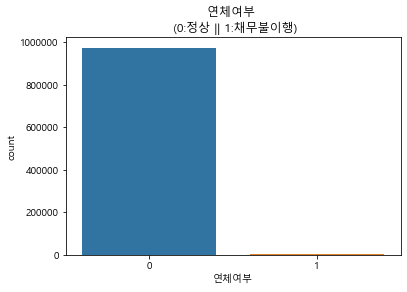

In [15]:
sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

In [16]:
#독립변수
X = df_m.drop(columns=['연체여부'])
y = df_m['연체여부']

* Random State seed 주는 것 보류

In [17]:
#stratify = y는 클래스 비율을 유지 즉 위의 0: 97.53 %  || 1: 2.47% 비율을 Train-Test에도 동일 적용

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=156)
print(X_train.shape, X_test.shape)

(684173, 60) (293217, 60)


In [18]:
y_train.value_counts() / y_train.value_counts().sum() *100

0    99.647165
1     0.352835
Name: 연체여부, dtype: float64

In [19]:
y_test.value_counts() / y_test.value_counts().sum() *100

0    99.647019
1     0.352981
Name: 연체여부, dtype: float64

In [20]:
#.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_test.csv')

In [21]:
#y_test.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_test.csv')

In [22]:



#X_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/X_train.csv')

In [23]:
#y_train.to_csv('C:/Users/ksy/Desktop/개인/CreDB예시/data/SMOTEENN용/y_train.csv')

In [24]:
X_train.shape

(684173, 60)

In [25]:

X_test.shape

(293217, 60)

In [26]:
y_train.shape

(684173,)

In [27]:

y_test.shape

(293217,)

## 3. SMOTE OverSampling

Train Data Set에 대하여 Smote OverSampling 실행

원래 아이디어는 smote -> undersampling 해서 모델링 시간을 줄이려했지만...

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7) # RandomState 변경
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [29]:
print('SMOTE 적용 후 Data Set Size', X_train_over.shape, y_train_over.shape)

SMOTE 적용 후 Data Set Size (1363518, 60) (1363518,)


In [30]:
print('SMOTE 적용 후 Class 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 후 Class 분포:
 1    681759
0    681759
Name: 연체여부, dtype: int64


Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

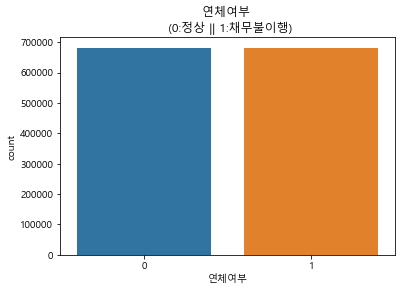

In [31]:
sns.countplot('연체여부', data = y_train_over.to_frame())
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

# Modelling

In [32]:
def auc_return(y_test, pred):
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test,pred)
    auc = metrics.auc(fpr,tpr)
    return auc

# 1. Regression

전통적으로 채무불이행 예측 모델은 다음과 같은 기본 알고리즘을 많이 사용함. 그 이유는 채무불이행 이유에 대한 '설명가능성'이 있기 때문 <br>
보수적인 금융권 특성, 고객과의 신뢰 등을 이유로 알고리즘의 설명 가능성에 대해 매우 민감함 <br>

## 1-1) Logistic

In [33]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train_over,y_train_over)

LogisticRegression()

In [33]:
lr_pred = lr.predict(X_test)

In [37]:
model_assessment(y_test, lr_pred)

accuracy 0.6066667348755359 

confusion_matrix [[177051 115131]
 [   201    834]] 

              precision    recall  f1-score   support

           0       1.00      0.61      0.75    292182
           1       0.01      0.81      0.01      1035

    accuracy                           0.61    293217
   macro avg       0.50      0.71      0.38    293217
weighted avg       1.00      0.61      0.75    293217



In [1]:
import pickle as pkl
with open('lr_predict.pkl','rb') as infile:
    lr_predict= pkl.load(infile)

In [35]:
auc = auc_return(y_test,lr_pred) # 변경
print(auc)

0.7058792271523436


In [36]:
auc = auc.round(2)

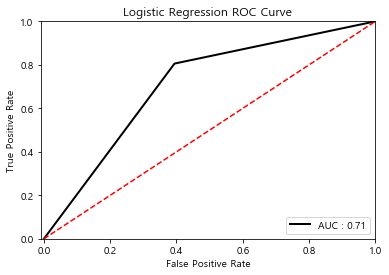

In [37]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, lr_pred)
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/Logistic Regression ROC.png')
plt.show()

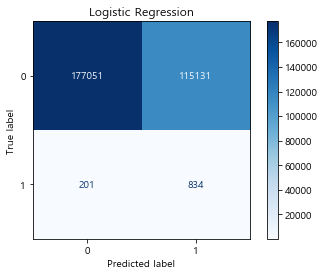

In [40]:
plot_confusion_matrix(lr,X_test,y_test,cmap='Blues')

plt.title('Logistic Regression')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/Logistic Regression Confusion Matrix.png')
plt.show()

In [41]:
#모델저장
import pickle as pkl
with open("lr_model.pkl",'wb') as outfile:
    pkl.dump(lr,outfile)

In [42]:
#모델저장
import pickle as pkl
with open("lr_predict.pkl",'wb') as outfile:
    pkl.dump(lr_pred,outfile)

# 2. Classification

### 2-1) XGBOOST

In [43]:
#X_test.head()

In [44]:
######기본모델
xgb_over_model = XGBClassifier(n_estimators=100,
                              objective='binary:logistic',
                              seed=156,
                              learning_rate=0.01)
xgb_over_model.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.68854	validation_1-logloss:0.68742
[1]	validation_0-logloss:0.68147	validation_1-logloss:0.68232
[2]	validation_0-logloss:0.67761	validation_1-logloss:0.67695
[3]	validation_0-logloss:0.67123	validation_1-logloss:0.67205
[4]	validation_0-logloss:0.66662	validation_1-logloss:0.66699
[5]	validation_0-logloss:0.66139	validation_1-logloss:0.66198
[6]	validation_0-logloss:0.65723	validation_1-logloss:0.65714
[7]	validation_0-logloss:0.65148	validation_1-logloss:0.65245
[8]	validation_0-logloss:0.64748	validation_1-logloss:0.64791
[9]	validation_0-logloss:0.64213	validation_1-logloss:0.64338
[10]	validation_0-logloss:0.63820	validation_1-logloss:0.63875
[11]	validation_0-logloss:0.63367	validation_1-logloss:0.63431
[12]	validation_0-logloss:0.62970	validation_1-logloss:0.63010
[13]	validation_0-logloss:0.62530	validation_1-logloss:0.62605
[14]	validation_0-logloss:0.62107	validation_1-logloss:0.62187
[15]	validation_0-logloss:0.61695	validation_1-logloss:0.61779
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=156,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
xgb_over_pred = xgb_over_model.predict(X_test)

In [46]:
print('<OverSampling 후 XGBoost 기본 모델 성능>')
model_assessment(y_test, xgb_over_pred)

<OverSampling 후 XGBoost 기본 모델 성능>
accuracy 0.8100826350450349 

confusion_matrix [[236853  55329]
 [   358    677]] 

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    292182
           1       0.01      0.65      0.02      1035

    accuracy                           0.81    293217
   macro avg       0.51      0.73      0.46    293217
weighted avg       1.00      0.81      0.89    293217



In [47]:
auc = auc_return(y_test,xgb_over_pred) # 변경
print(auc)

0.732370716127996


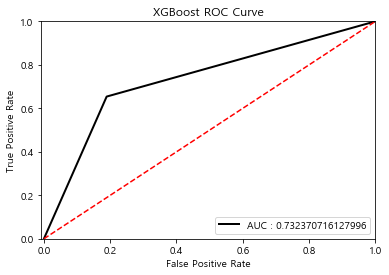

In [48]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, xgb_over_pred)
plt.title('XGBoost ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/XGBoost ROC.png')
plt.show()

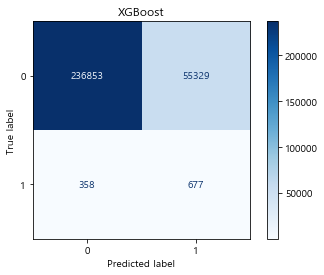

In [49]:
plot_confusion_matrix(xgb_over_model,X_test,y_test,cmap='Blues')

plt.title('XGBoost')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/XGBoost.png')
plt.show()

In [50]:
#모델저장
import pickle as pkl
with open("xgb_model.pkl",'wb') as outfile:
    pkl.dump(xgb_over_model,outfile)

In [51]:
#모델저장
import pickle as pkl
with open("xgb_predict.pkl",'wb') as outfile:
    pkl.dump(xgb_over_pred,outfile)

In [52]:
xgb_over_model.feature_importances_

array([1.1225552e-02, 5.6309387e-02, 3.7177748e-03, 2.6314752e-03,
       7.1423720e-03, 8.9654402e-04, 0.0000000e+00, 6.0096877e-03,
       4.3493845e-03, 3.5843553e-03, 8.8524064e-03, 3.5320236e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.5456528e-02,
       2.2282940e-04, 1.9881134e-03, 3.6704235e-03, 0.0000000e+00,
       5.5784686e-03, 7.0515549e-04, 4.4587343e-03, 1.1357876e-02,
       7.1106986e-03, 6.7730906e-04, 0.0000000e+00, 0.0000000e+00,
       1.5526663e-02, 2.7999654e-03, 0.0000000e+00, 0.0000000e+00,
       5.4991576e-03, 6.3514621e-03, 5.8506560e-03, 7.2096242e-04,
       9.8048733e-04, 8.3745830e-03, 4.7129449e-02, 2.5065129e-03,
       6.5572637e-01, 4.0482327e-02, 4.8689387e-04, 0.0000000e+00,
       3.5797479e-03, 0.0000000e+00, 6.8422649e-03, 1.8557403e-03,
       2.9183454e-03, 0.0000000e+00, 0.0000000e+00, 2.0127988e-03,
       1.0131989e-03, 5.0551193e-03, 8.3257239e-03, 4.1145999e-03,
       4.5209103e-03, 0.0000000e+00, 0.0000000e+00, 7.8490097e

In [38]:
import pickle as pkl
with open('xgb_model.pkl','rb') as infile:
    xgb_over_model = pkl.load(infile)

In [39]:
import pickle as pkl
with open('xgb_predict.pkl','rb') as infile:
    xgb_over_pred = pkl.load(infile)

In [40]:
model_assessment(y_test, xgb_over_pred)

accuracy 0.8100826350450349 

confusion_matrix [[236853  55329]
 [   358    677]] 

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    292182
           1       0.01      0.65      0.02      1035

    accuracy                           0.81    293217
   macro avg       0.51      0.73      0.46    293217
weighted avg       1.00      0.81      0.89    293217



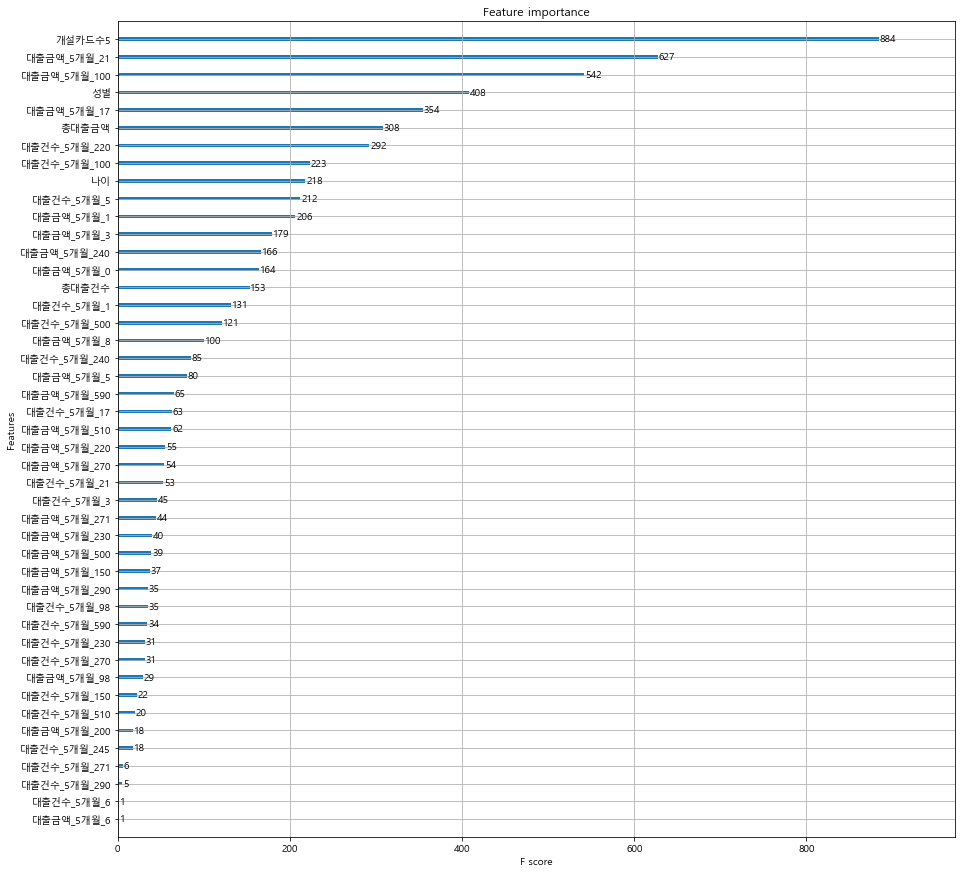

In [41]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_over_model.get_booster(), ax=ax)
#ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/XGBoost.png')

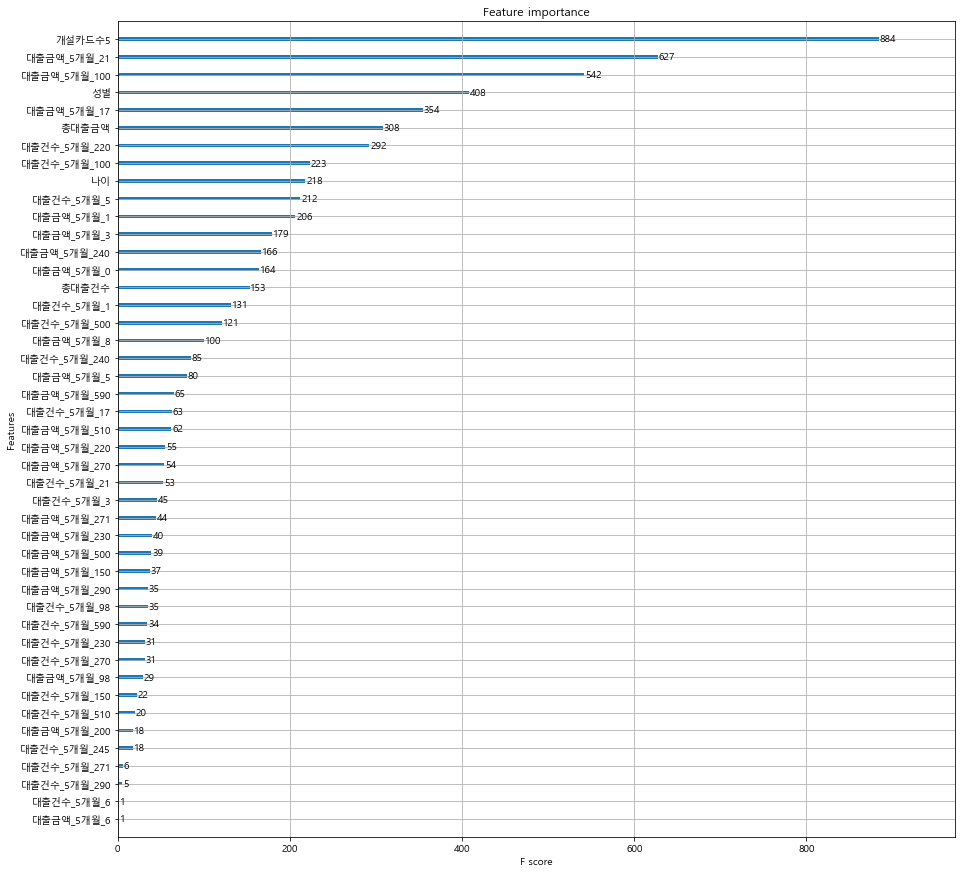

In [53]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgb_over_model.get_booster(), ax=ax)
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/XGBoost.png')

## 2) LightGBM

In [54]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=100)

In [55]:
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=10, eval_set = [(X_train_over, y_train_over), (X_test, y_test)], eval_metric='logloss')

[1]	training's binary_logloss: 0.642026	valid_1's binary_logloss: 0.642457
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.600184	valid_1's binary_logloss: 0.601542
[3]	training's binary_logloss: 0.56533	valid_1's binary_logloss: 0.567785
[4]	training's binary_logloss: 0.535375	valid_1's binary_logloss: 0.538848
[5]	training's binary_logloss: 0.509928	valid_1's binary_logloss: 0.514698
[6]	training's binary_logloss: 0.488332	valid_1's binary_logloss: 0.494319
[7]	training's binary_logloss: 0.469342	valid_1's binary_logloss: 0.476399
[8]	training's binary_logloss: 0.452907	valid_1's binary_logloss: 0.461112
[9]	training's binary_logloss: 0.438718	valid_1's binary_logloss: 0.448015
[10]	training's binary_logloss: 0.425454	valid_1's binary_logloss: 0.435959
[11]	training's binary_logloss: 0.414054	valid_1's binary_logloss: 0.425386
[12]	training's binary_logloss: 0.403099	valid_1's binary_logloss: 0.415406
[13]	training's binary_logloss: 0.392

LGBMClassifier()

In [56]:
lgbm_pred = lgbm.predict(X_test)

In [57]:
print('<OverSampling 후 LightGBM 기본 모델 성능>')
model_assessment(y_test, lgbm_pred)

<OverSampling 후 LightGBM 기본 모델 성능>
accuracy 0.9686853081506188 

confusion_matrix [[283871   8311]
 [   871    164]] 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    292182
           1       0.02      0.16      0.03      1035

    accuracy                           0.97    293217
   macro avg       0.51      0.57      0.51    293217
weighted avg       0.99      0.97      0.98    293217



In [58]:
auc = auc_return(y_test,lgbm_pred) # 변경
print(auc)

0.5650047533406566


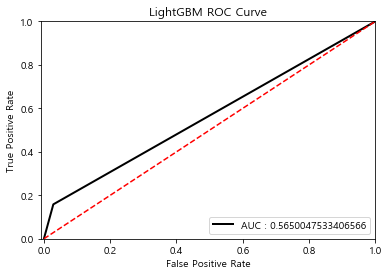

In [59]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, 
                                                lgbm_pred) ##############
plt.title('LightGBM ROC Curve') ################
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/LightGBM ROC.png')
plt.show()

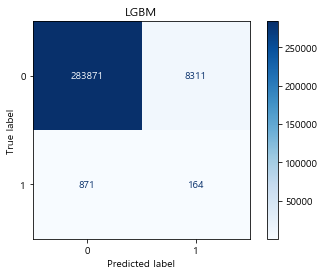

In [61]:
plot_confusion_matrix(lgbm #######
                      ,X_test,y_test,cmap='Blues')

plt.title('LGBM') ##############
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/LightGBM.png') ##############
plt.show()

In [62]:
#모델저장
import pickle as pkl
with open("lgbm_model.pkl",'wb') as outfile:
    pkl.dump(lgbm,outfile)

In [63]:
#모델저장
import pickle as pkl
with open("lgbm_model.predict",'wb') as outfile:
    pkl.dump(lgbm_pred,outfile)

## 3) RandomForest

In [32]:
rfc = RandomForestClassifier(n_estimators=100, random_state=146)
rfc.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=146)

In [33]:
rfc_prd = rfc.predict(X_test)

In [34]:
print('<OverSampling 후 RandomForest 기본 모델 성능>')

model_assessment(y_test,rfc_prd)

<OverSampling 후 RandomForest 기본 모델 성능>
accuracy 0.9877872019698721 

confusion_matrix [[289582   2600]
 [   981     54]] 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    292182
           1       0.02      0.05      0.03      1035

    accuracy                           0.99    293217
   macro avg       0.51      0.52      0.51    293217
weighted avg       0.99      0.99      0.99    293217



In [35]:
auc = auc_return(y_test,rfc_prd) # 변경
print(auc)

0.5216376749095932


## 4) Decision Tree

In [36]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_over, y_train_over)

In [37]:
dt_pred = dt.predict(X_test)

In [38]:
print('<OverSampling 후 Decision Tree 기본 모델 성능>')

model_assessment(y_test,dt_pred)

<OverSampling 후 Decision Tree 기본 모델 성능>
accuracy 0.9742511518772786 

confusion_matrix [[285555   6627]
 [   923    112]] 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    292182
           1       0.02      0.11      0.03      1035

    accuracy                           0.97    293217
   macro avg       0.51      0.54      0.51    293217
weighted avg       0.99      0.97      0.98    293217



In [39]:
auc = auc_return(y_test,dt_pred) # 변경
print(auc)

0.5427657458687404


## 5) Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21,max_depth = 5)
gbc.fit(X_train_over, y_train_over)
gbc_pred = gbc.predict(X_test)

In [71]:
gbc_pred = gbc.predict(X_test)

In [72]:
print('Gradient Boosting 기본 모델 성능')

model_assessment(y_test,gbc_pred)

Gradient Boosting 기본 모델 성능
accuracy 0.9028125927214316 

confusion_matrix [[264300  27882]
 [   615    420]] 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    292182
           1       0.01      0.41      0.03      1035

    accuracy                           0.90    293217
   macro avg       0.51      0.66      0.49    293217
weighted avg       0.99      0.90      0.95    293217



In [ ]:
gbc_pred = gbc.predict(X_test)

In [75]:
#모델저장
import pickle as pkl
with open("gbc_model.pkl",'wb') as outfile:
    pkl.dump(gbc,outfile)

In [46]:
with open('gbc_predict.pkl','rb') as infile:
    gbc_pred = pkl.load(infile)

In [47]:
auc = auc_return(y_test,gbc_pred) # 변경
print(auc)

0.655185139220849


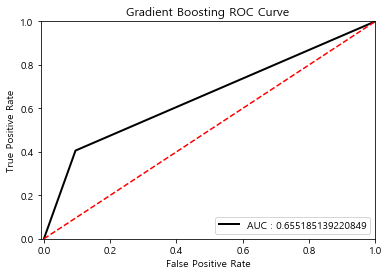

In [78]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, gbc_pred)
plt.title('Gradient Boosting ROC Curve')
plt.plot(fpr, tpr, 'k-', linewidth=2,label = 'AUC : ' + str(auc))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis([-0.01, 1,0,1])
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/GBC.png') 
plt.show()

In [ ]:
from math

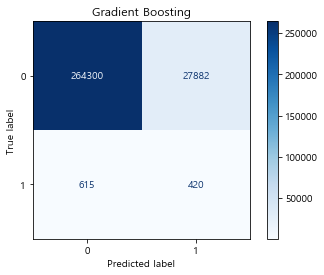

In [79]:
plot_confusion_matrix(gbc,X_test,y_test,cmap='Blues')

plt.title('Gradient Boosting')
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/PCA_X/png/GBC.png') 
plt.show()

## 5) CatBoost